In [5]:
# Importe
import os
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
import random
from community import community_louvain
import time

In [6]:
# Sprache definieren
language = "DE"

# Ordner-Pfad
base_dir = "twitch"

# Dateipfade für DE
edges_file = os.path.join(base_dir, language, f"musae_{language}_edges.csv")
target_file = os.path.join(base_dir, language, f"musae_{language}_target.csv")

# Edges laden
edges = pd.read_csv(edges_file)
print(f"{language} Edges loaded: {edges.shape[0]} edges")

# Targets laden
targets = pd.read_csv(target_file)
print(f"{language} Targets loaded: {targets.shape[0]} nodes")

# Graph erstellen
G_de = nx.from_pandas_edgelist(edges, source="from", target="to")
print(f"Graph for {language} created successfully with {G_de.order()} nodes and {G_de.size()} edges.")

DE Edges loaded: 153138 edges
DE Targets loaded: 9498 nodes
Graph for DE created successfully with 9498 nodes and 153138 edges.


Subgraphen mit unterschiedlichen Ordnungen erstellen:

In [7]:
# Subgraph-Ordnungen definieren (10 Größen, gleichmäßig verteilt bis 15%)
subgraph_orders = [int(G_de.order() * p) for p in [0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.125, 0.13, 0.14, 0.15]]

# 3 Wiederholungen für jede Subgraph-Ordnung
subgraphs = {
    order: [G_de.subgraph(random.sample(list(G_de.nodes()), order)).copy() for _ in range(3)]
    for order in subgraph_orders
}

Laufzeit der Algorithmen messen:

In [8]:
girvan_times = []
louvain_times = []

for order, graphs in subgraphs.items():
    girvan_order_times = []
    louvain_order_times = []
    
    for graph in graphs:
        # Girvan-Newman
        start = time.time()
        list(girvan_newman(graph))  # Girvan-Newman ausführen
        girvan_order_times.append(time.time() - start)
        
        # Louvain
        start = time.time()
        community_louvain.best_partition(graph)  # Louvain ausführen
        louvain_order_times.append(time.time() - start)
    
    girvan_times.append((order, sum(girvan_order_times) / len(girvan_order_times)))
    louvain_times.append((order, sum(louvain_order_times) / len(louvain_order_times)))

In [9]:
# Ergebnisse in einer CSV-Datei speichern
orders, girvan_runtime = zip(*girvan_times)
_, louvain_runtime = zip(*louvain_times)

pd.DataFrame({
    "Order": orders, 
    "Girvan-Newman": girvan_runtime, 
    "Louvain": louvain_runtime
}).to_csv("runtime_results.csv", index=False)

print("Die Ergebnisse wurden erfolgreich als 'runtime_results.csv' gespeichert.")

Die Ergebnisse wurden erfolgreich als 'runtime_results.csv' gespeichert.


Ergebnisse Visualisieren:

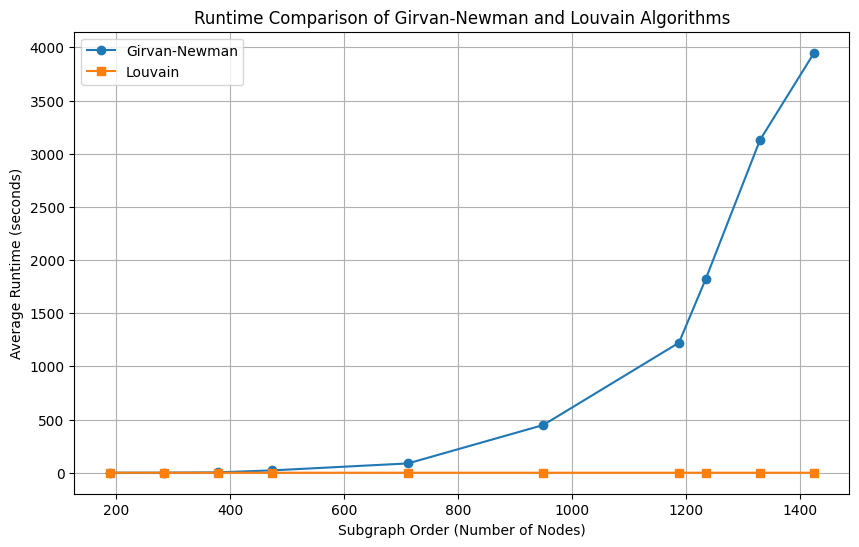

In [10]:
orders, girvan_runtime = zip(*girvan_times)
_, louvain_runtime = zip(*louvain_times)

plt.figure(figsize=(10, 6))
plt.plot(orders, girvan_runtime, label="Girvan-Newman", marker="o")
plt.plot(orders, louvain_runtime, label="Louvain", marker="s")
plt.xlabel("Subgraph Order (Number of Nodes)")
plt.ylabel("Average Runtime (seconds)")
plt.title("Runtime Comparison of Girvan-Newman and Louvain Algorithms")
plt.legend()
plt.grid(True)
plt.show()

##### Interpretation der Ergebnisse und Reflexion zum Experiment

Interpretation der Ergebnisse:
- **Girvan-Newman**:
  - Die Laufzeit wächst exponentiell mit der Subgraph-Größe (z. B. über 4000 Sekunden für größere Subgraphen).
  - Diese hohe Komplexität macht den Algorithmus für große Graphen unpraktikabel.
- **Louvain**:
  - Die Laufzeit bleibt konstant niedrig, auch bei größeren Subgraphen.
  - Die Effizienz macht Louvain ideal für große Graphen.


**Reflexion des Experiments:**

Stärken:
- **Zehn Subgraph-Ordungen**: Breites Spektrum von Größen getestet.
- **Wiederholungen**: Drei Subgraphen pro Ordnung sorgen für zuverlässige Ergebnisse.
- **Visualisierung**: Die Unterschiede in der Skalierbarkeit werden klar dargestellt.

Schwächen:
- **Girvan-Newman**: Begrenzte Subgraph-Größen wegen langer Laufzeit.
- **Nur ein Datensatz**: Die Ergebnisse könnten bei anderen Graphen variieren.

Empfehlungen:
1. **Girvan-Newman optimieren**: Frühzeitiges Stoppen oder Parallelisierung.
2. **Weitere Datensätze testen**: Ergebnisse auf andere Sprachgruppen erweitern.

Das Experiment zeigt deutlich, dass Louvain aufgrund seiner Effizienz für große Graphen vorzuziehen ist, während Girvan-Newman auf kleine Graphen beschränkt bleibt.